In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV ,cross_val_score
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns 


import warnings
warnings.filterwarnings("ignore")

In [5]:
path = "heart.csv"
df = pd.read_csv(path)
df.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


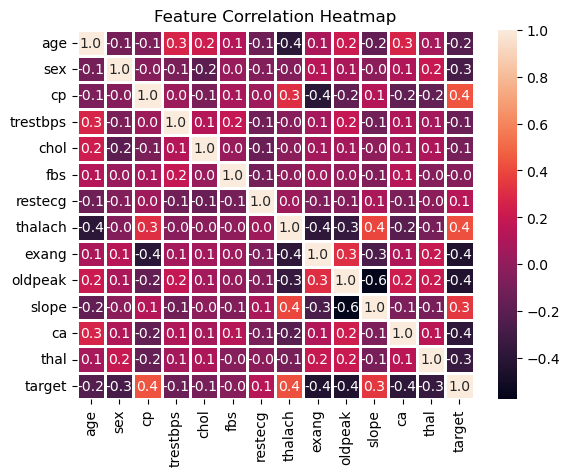

In [9]:
sns.heatmap(df.corr() , annot=True , fmt= '.1f',linewidths='1')
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
for col in df.columns:
    df[col] = np.where(df[col] > df[col].quantile(0.99), df[col].quantile(0.99), df[col])

In [15]:
X = df.drop(columns=['target'])
y = df['target']

In [17]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
bagging_clf=BaggingClassifier(estimator=DecisionTreeClassifier(),
                             n_estimators=150,
                             random_state=42)

In [23]:
bagging_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=150,
                  random_state=42)

In [25]:
y_pred=bagging_clf.predict(X_test)


In [27]:
print("Baseline Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))


Baseline Bagging Classifier Accuracy: 1.0


In [29]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [31]:
conf_matrix=confusion_matrix(y_test , y_pred)


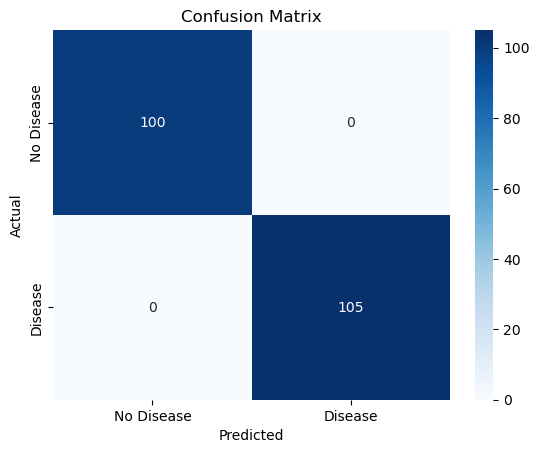

In [33]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()